In [7]:
import numpy as np
import pandas as pd

# 2.1. Problem Statement: Numpy

### Problem Statement 1:

Write a function so that the columns of the output matrix are powers of
the input vector.

The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power
of N - i - 1.

HINT: Such a matrix with a geometric progression in each row is named for Alexandre-
Theophile Vandermonde.

In [162]:
x = np.array([1, 2, 3, 5])
N = 3
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])

### Problem Statement 2:

Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
of the given sequence is defined as follows:

The moving average sequence has n-k+1 elements as shown below.

The moving averages with k=4 of a ten-value sequence (n=10) is shown below

i 1 2 3 4 5 6 7 8 9 10

===== == == == == == == == == == ==

Input 10 20 30 40 50 60 70 80 90 100

y1 25 = (10+20+30+40)/4

y2 35 = (20+30+40+50)/4

y3 45 = (30+40+50+60)/4

y4 55 = (40+50+60+70)/4

y5 65 = (50+60+70+80)/4

y6 75 = (60+70+80+90)/4

y7 85 = (70+80+90+100)/4

Thus, the moving average sequence has n-k+1=10-4+1=7 values.

Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [11]:
##One Function with np.convolve()

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [12]:
a = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
moving_average(a,w=3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

In [13]:
##Second funtion with np.cumsum
def moving_average1(a, n=3) :
    ret = np.cumsum(a, dtype=float) ##
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [14]:
a = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
moving_average1(a,n=3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

# 2.2. Problem Statement: Pandas

### Problem Statement 1:

1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position

Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}

The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

import pandas as pd

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})


In [17]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

s = pd.Series(df['X'])

(s.groupby(s.eq(0).cumsum().mask(s.eq(0))).cumcount() + 1).mask(s.eq(0), 0).tolist()

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]

2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.


In [18]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

3) Find the sum of the values in s for every Wednesday

In [19]:
s[dti.weekday == 2].sum() 

24.46938628435524

4) Average For each calendar month

In [20]:
s.resample('M', how='mean')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2015-01-31    0.488955
2015-02-28    0.413418
2015-03-31    0.493211
2015-04-30    0.555832
2015-05-31    0.663398
2015-06-30    0.465756
2015-07-31    0.484719
2015-08-31    0.488446
2015-09-30    0.476238
2015-10-31    0.371641
2015-11-30    0.393085
2015-12-31    0.590177
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the
highest value occurred.

In [21]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


2015-01-31   2015-01-23
2015-05-31   2015-05-05
2015-09-30   2015-07-08
2016-01-31   2015-12-29
dtype: datetime64[ns]

### Problem Statement 2:

Read the dataset from the below link

https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

Questions:

1) Delete unnamed columns

2) Show the distribution of male and female

3) Show the top 5 most preferred names

4) What is the median name occurrence in the dataset

5) Distribution of male and female born count by states

In [8]:
df_name = pd.read_csv('US_Baby_Names_right.csv')

In [9]:
#1) Delete unnamed columns
df_name.drop(['Unnamed: 0'],axis=1)#inplace=True can be placed too make permanent change
df_name.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [10]:
#2) Show the distribution of male and female
df_name.groupby('Gender')['Gender'].count()


Gender
F    558846
M    457549
Name: Gender, dtype: int64

In [11]:
#3) Show the top 5 most preferred names
df_name.groupby('Name')['Name'].count().sort_values(ascending=False).head(5)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [12]:
#4) What is the median name occurrence in the dataset
val = df_name['Id'].median()
df_name.loc[df_name['Id'] == val]['Name']

508197    Kasey
Name: Name, dtype: object

In [87]:
#5) Distribution of male and female born count by states
df_name.groupby(['State','Gender'])['Name'].count()

State  Gender
AK     F          2404
       M          2587
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     F          3255
       M          3546
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     F          2838
       M          29

# 2.3. Problem Statement: Use Cases on Numpy and Pandas

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
    
Output:
    
1) If the List element is a alphabet or string, the output will be

The entry is a

Oops! <class 'ValueError'> occured.

Next entry.

2) If the List element is “0”,the output will be

The entry is 0

Oops! <class 'ZeroDivisionError'> occured.

Next entry.

3) If the List element is and integer except 0,then output will be:
    
The entry is 2

The reciprocal of 2 is 0.5 // reciprocal of an integer

In [73]:
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


2) Array out of Bound Exception

Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except)

In [103]:
import sys

a = [1, 2, 3] 
try:  
    print ("Second element = %d" %(a[1])) 
    print ("Fourth element = %d" %(a[3]))
except IndexError: 
    print("Oops!",sys.exc_info()[0],"occured.")


Second element = 2
Oops! <class 'IndexError'> occured.


3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.

Note : The module created as fibo.py has to be placed in lib folder

For linux/ubuntu path = /home/anaconda/lib/python3

For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [89]:
import fibo
fibo.fib(1000)

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 


4) Write a python module script that contains ispalindrome() method to calculate the inputstring as palindrome string or not and save it as palindrome.py.

In [95]:
#Import palindrome from palindrome.py
import palindrome as pal

s = "malayalam"
ans = pal.isPalindrome(s) 
  
if ans == 1: 
    print("Yes") 
else: 
    print("No") 

Yes


5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [1]:
from cryptography.fernet import Fernet,MultiFernet
class Cipher:
    #Constructor
    def __init__(self,string):
        self.string= string
        self.key = Fernet.generate_key() #this is the key
        self.cipher_suite = Fernet(self.key)
        encoded_text = self.cipher_suite.encrypt(self.string.encode('utf-8'))        
        decoded_text = self.cipher_suite.decrypt(encoded_text)
    def excryption(self):
        return print('Encrypted text of input String is: {}'.format(encoded_text))
    def decryption(self):
        return print('\nDecypted text of is: {}'.format(decoded_text))

In [ ]:
Cipher('Encoding Test String').excryption()
Cipher('Encoding Test String').decryption()

6) Get Data from the following link:

http://files.grouplens.org/datasets/movielens/ml-20m.zip

We will be using the following files for this exercise:

ratings.csv : userId,movieId,rating, timestamp

tags.csv : userId,movieId, tag, timestamp

movies.csv : movieId, title, genres

I. Read the dataset using pandas.

In [168]:
rating = pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [157]:
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [158]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


II. Extract the first row from tags and print its type.

In [32]:
print(tags.head(1))

print(tags.dtypes)

   userId  movieId          tag   timestamp
0      18     4141  Mark Waters  1240597180
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


III. Extract row 0, 11, 2000 from tags DataFrame.

In [52]:
tags.loc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


IV. Print index, columns of the DataFrame.

In [56]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [57]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify
using describe().

In [64]:
rating["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

VI. Filter out ratings with rating > 5

In [65]:
rating[rating["rating"] > 5]

,userId,movieId,rating,timestamp


VII. Find how many null values, missing values are present. Deal with them. Print out how many
rows have been modified.

In [140]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [141]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [169]:
movies[movies['genres'].str.lower()=='animation'].head()

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation


IX. Find the average rating of movies.

In [150]:
rating['rating'].mean()

3.5255285642993797

X. Perform an inner join of movies and tags based on movieId.

In [159]:
pd.merge(movies, tags, on='movieId', how='inner').head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [171]:
movies.head(2)
rating.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676


XII. Split 'genres' into multiple columns.

In [173]:
movies['genres'].str.split('|',expand=True).head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


XIII. Extract year from title e.g. (1995).

In [174]:
df1 = pd.Series(data = movies['title'].str.split(' '))
for i in df1:
    s= i[-1]
    print(s)

(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1994)
(1995)
(1994)
(1995)
(1995)
(1995)
(1995)
(1994)
(1995)
(1995)
(1996)
(1995)
(1996)
(1996)
(1996)
(1996)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1996)
(1996)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1996)
(1996)
(1996)
(1995)
(1995)
(1996)
(1995)
(1996)
(1996)
(1995)
(1995)
(1994)
(1995)
(1996)
(1996)
(1996)
(1996)
(1996)
(1995)
(1994)
(1996)
(1996)
(1995)
(1995)
(1976)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1996)
(1995)
(1996)
(1992)
(1992)
(1994)
(1995)
(1996)
(1994)
(1994)
(1994)
(1996)
(1995)
(1995)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1996)
(1996)
(1988)
(1995)
(1995)

(1978)
(1982)
(1982)
(1986)
(1991)
(1985)
(1984)
(1986)
(1985)
(1986)
(1986)
(1987)
(1980)
(1989)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1986)
(1968)
(1984)
(1990)
(1978)
(1987)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1988)
(1988)
(1997)
(1948)
(1976)
(1972)
(1969)
(1966)
(1964)
(1956)
(1956)
(1955)
(1953)
(1951)
(1950)
(1998)
(1997)
(1998)
(1997)
(1997)
(1988)
(1987)
(1998)
(1998)
(1997)
(1998)
(1998)
(1949)
(1947)
(1944)
(1943)
(1942)
(1941)
(1941)
(1939)
(1938)
(1937)
(1936)
(1936)
(1934)
(1933)
(1932)
(1931)
(1931)
(1930)
(1930)
(1930)
(1929)
(1929)
(1928)
(1928)
(1927)
(1928)
(1927)
(1927)
(1925)
(1914)
(1998)
(1997)
(1998)
(1998)
(1999)
(1998)
(1998)
(1976)
(1975)
(1980)
(1983)
(1984)
(1987)
(1987)
(1988)
(1988)
(1988)
(1989)
(1990)
(1990)
(1991)
(1992)
(1992)
(1981)
(1982)
(1982)
(1984)
(1984)
(1984)
(1986)
(1986)
(1986)
(1988)
(1989)
(1991)
(1991)
(1991)
(1992)
(1993)
(1994)
(1998)
(1998)
(1998)
(1995)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)
(1998)

(2000)
(2001)
(2001)
(2001)
(2000)
(2000)
(2001)
(2001)
(2001)
(2000)
(2000)
(2001)
(2001)
(2000)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2001)
(2001)
(2001)
(1999)
(2000)
(1999)
(2000)
(1990)
(1996)
(1993)
(1980)
(1939)
(1981)
(1986)
(1988)
(1985)
(1989)
(1947)
(1970)
(1966)
(1963)
(1952)
(1965)
(1960)
(1966)
(1954)
(1995)
(1945)
(1971)
(1965)
(1979)
(1980)
(1990)
(1991)
(1978)
(1972)
(1991)
(1983)
(1990)
(1989)
(1990)
(1997)
(2000)
(1986)
(1990)
(1978)
(1989)
(1984)
(1987)
(1990)
(1997)
(1986)
(1985)
(1974)
(1991)
(1984)
(2001)
(2001)
(2001)
(2000)
(2001)
(2001)
(2001)
(1997)
(2001)
(2001)
(2001)
(2001)
(2000)
(2000)
(2000)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2000)
(2000)
(2001)
(2001)
(2001)
(2001)
(2001)
(2000)
(2000)
(2000)
(2001)
(2001)
(2001)
(2000)
(2000)
(2000)
(2000)
(1996)
(1983)
(1962)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2000)
(1999)
(2000)
(1963)
(1983)
(1985)
(1925)
(1934)
(1989)
(1982)
(1968)
(1969)
(1972)
(1966)
(1991)
(1993)
(1964)
(1999)
(1980)
(1991)

(1983)
(1982)
(2003)
(2003)
(2003)
(2003)
(2003)
(2003)
(2002)
(2002)
(2002)
(2002)
(2000)
(2001)
(1993)
(1937)
(1983)
(1983)
(1979)
(1972)
(1967)
(1992)
(1989)
(1988)
(1974)
(1986)
(1965)
(1987)
(1990)
(1951)
(1963)
(1959)
(1976)
(2003)
(2003)
(2003)
(2003)
(2001)
(2003)
(2001)
(2002)
(2002)
(2001)
(2002)
(2003)
(2002)
(1992)
(1996)
(1985)
(1986)
(2001)
(1991)
(1993)
(1988)
(1986)
(2002)
(1959)
(1993)
(2001)
(2002)
(2003)
(2003)
(2002)
(2002)
(2001)
(2001)
(2002)
(2003)
(2003)
(2001)
(2001)
(2001)
(2001)
(1961)
(1975)
(1957)
(1942)
(1971)
(1973)
(1955)
(1966)
(1993)
(1977)
(1990)
(1957)
(1953)
(1990)
(1959)
(1991)
(1983)
(1998)
(1999)
(1988)
(1969)
(1991)
(1969)
(2002)
(2003)
(2003)
(2003)
(2003)
(2001)
(1937)
(1966)
(1976)
(1967)
(1945)
(1943)
(1953)
(1992)
(2002)
(2003)
(2003)
(2003)
(2003)
(2002)
(2002)
(2002)
(1990)
(1973)
(1997)
(1950)
(1989)
(1987)
(1948)
(1979)
(2001)
(2002)
(2003)
(2002)
(2001)
(2001)
(2003)
(2003)
(2002)
(2003)
(2002)
(2003)
(2003)
(2002)
(2002)
(2002)
(2003)

(1958)
(1980)
(1996)
(1961)
(1962)
(1957)
(1993)
(1984)
(1986)
(1950)
(1960)
(2003)
(1997)
(1963)
(1991)
(1982)
(1949)
(1949)
(2002)
(1969)
(1999)
(1979)
(1970)
(1971)
(1961)
(1990)
(1964)
(1976)
(1968)
(1997)
(1942)
(1946)
(1948)
(1949)
(1979)
(1981)
(1946)
(1965)
(1942)
(1945)
(1962)
(1993)
(1989)
(1946)
(2003)
(1969)
(2004)
(2004)
(2004)
(2004)
(1951)
(1938)
(1966)
(1968)
(1969)
(2002)
(1996)
(2003)
(2003)
(1977)
(2001)
(1966)
(1969)
(2004)
(2004)
(2003)
(1992)
(1959)
(2001)
(1988)
(1999)
(1987)
(2004)
(2004)
(2003)
(2004)
(2004)
(2002)
(2004)
(2004)
(2004)
(1968)
(1969)
(1963)
(1967)
(1966)
(1965)
(1979)
(1983)
(1962)
(1987)
(1999)
(1983)
(1964)
(2004)
(2004)
(2004)
(2003)
(2004)
(2004)
(2004)
(2004)
(2002)
(1974)
(1995)
(1967)
(2004)
(1992)
(1994)
(1979)
(1985)
(2003)
(1990)
(1953)
(1986)
(1963)
(1975)
(1965)
(1980)
(1988)
(1986)
(1979)
(1964)
(1980)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(2004)
(1952)
(1958)
(1940)

(1999)
(2005)
(2005)
(2005)
(2001)
(2005)
(2005)
(2003)
(2005)
(2005)
(2004)
(2004)
(2004)
(1985)
(1956)
(1965)
(1999)
(1971)
(1960)
(1968)
(1936)
(1930)
(1953)
(1931)
(1983)
(1939)
(1948)
(1994)
(1939)
(2004)
(1969)
(1943)
(1985)
(2002)
(2004)
(1929)
(1959)
(2001)
(1948)
(1987)
(2001)
(1996)
(2005)
(2003)
(2004)
(2003)
(2001)
(1975)
(1944)
(1989)
(1917)
(2002)
(2002)
(2005)
(1963)
(2003)
(2003)
(2005)
(1993)
(1997)
(1976)
(1992)
(1990)
(1939)
(2004)
(2005)
(2005)
(2005)
(1979)
(1934)
(2003)
(2003)
(1940)
(2003)
(1961)
(1938)
(1983)
(2002)
(2004)
(1944)
(2001)
(2004)
(1943)
(1943)
(2005)
(2004)
(1974)
(1993)
(2005)
(2004)
(2005)
(2005)
(2004)
(1997)
(2005)
(2005)
(2005)
(2003)
(2005)
(2005)
(2005)
(2003)
(2005)
(2005)
(1991)
(2004)
(2004)
(1993)
(1998)
(2004)

(1946)
(2004)
(1964)
(1999)
(1951)
(1953)
(2005)
(2003)
(2004)
(2004)
(2005)
(2004)
(2004)
(2005)
(2004)
(2004)
(2005)
(2004)
(2005)
(2005)
(2005)
(2004)
(2001)
(1935)
(1968)
(1936)
(2005)
(2004)
(2004)
(2004)
(2004)
(2004)
(1956

(2004)
(2006)
(1963)
(2007)
(2007)
(2007)
(2007)
(2007)
(2006)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2005)
(1947)
(1976)
(1967)
(1968)
(2007)
(2004)
(2007)
(2006)
(1943)
(2007)
(2006)
(2007)
(1965)
(2007)
(2007)
(2007)
(1974)
(2005)
(2007)
(2007)
(2007)
(2007)
(2002)
(1996)
(1949)
(2005)
(2007)
(2006)
(2007)
(2006)
(2007)
(2007)
(2006)
(1967)
(2007)
(2007)
(2006)
(2007)
(1933)
(2007)
(2007)
(2007)
(2007)
(2006)
(2000)
(2007)
(2006)
(1979)
(2006)
(2007)
(2006)
(2006)
(2007)
(2007)
(2004)
(2007)
(2006)
(1955)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2007)
(2006)
(2006)
(2006)
(2007)
(2006)
(2007)
(1961)
(1950)
(1965)
(2006)
(2007)
(2006)
(2007)
(2007)
(2006)
(1956)
(2007)
(2007)
(2007)
(2007)
(1986)
(2006)
(2003)
(2002)
(2006)
(2007)
(2007)
(1960)
(2006)
(2007)
(1971)
(1944)
(2006)
(2007)
(2006)
(2007)
(2007)
(2007)
(2008)
(2007)
(1999)
(1932)

(1955)
(1933)
(2008)
(1992)
(2008)
(2008)
(2009)
(2009)
(2005)
(2009)
(2001)
(1995)
(1976)
(2008)
(2009)
(2008)
(2005)
(2004)
(1992)
(2007)
(2009)
(2009)
(1989)
(2008)
(2006)
(2008)
(2009)
(1966)
(2006)
(2008)
(1987)
(2009)
(1950)
(2008)
(2009)
(1992)
(2009)
(2009)
(1957)
(1995)
(1949)
(2008)
(2009)
(2007)
(2007)
(2008)
(2000)
(2006)
(2004)
(1951)
(1951)
(1936)
(1932)
(2007)
(2008)
(1938)
(1938)
(1997)
(1932)
(2006)
(2009)
(2006)
(2004)
(2006)
(1929)
(2009)
(2009)
(2008)
(1962)
(2008)
(2007)
(2009)
(2009)
(1936)
(1955)
(1966)
(2009)
(1976)
(2009)
(2009)
(2008)
(1954)
(2009)
(1979)
(2007)
(2009)
(1990)
(1994)
(2008)
(1964)
(2008)
(2009)
(2008)
(2007)
(1987)
(2009)
(1996)
(1996)
(2007)
(2009)
(2009)
(1943)
(1946)
(1995)
(1982)
(2009)
(2009)
(1981)
(2009)
(2009)
(1966)
(2009)
(2007)
(1985)
(1933)
(1940)
(2009)
(2009)
(2002)
(2009)
(2009)
(2003)
(2009)
(2007)
(2009)
(2009)
(2008)
(1997)
(1935)
(1955)
(2009)
(2007)
(2009)
(2008)
(2009)
(1953)
(1959)
(1972)
(1956)
(1977)
(1975)
(2008)
(1923)

(1986)
(1963)
(1975)
(1953)
(2010)
(2010)
(2007)
(2009)
(2006)
(2009)
(2007)
(2008)
(2009)
(2006)
(2009)
(1966)
(2010)
(1968)
(2007)
(1995)
(1968)
(2008)
(1998)
(2009)
(2007)
(2007)
(1936)
(1942)
(1967)
(2010)
(2010)
(1997)
(2005)
(2009)
(2004)
(1933)
(2010)
(1968)
(2005)
(1984)
(1955)
(2008)
(2010)
(2010)
(2010)
(2010)
(1924)
(1921)
(2009)
(1933)
(2002)
(2000)
(2010)
(1950)
(2010)
(2009)
(1973)
(2009)
(1981)
(2010)
(2010)
(2008)
(2010)
(1975)
(2010)
(2010)
(1945)
(1958)
(2010)
(2010)
(2008)
(1942)
(1976)
(1937)
(1940)
(1962)
(1966)
(2010)
(1940)
(1978)
(1971)
(1980)
(1995)
(2009)
(2007)
(2009)
(2010)
(2010)
(2010)
(1945)
(1952)
(1929)
(1949)
(1982)
(1970)
(2002)
(1997)
(1951)
(1997)
(2003)
(2006)
(1949)
(1960)
(1995)
(2007)
(2001)
(2004)
(2008)
(2009)
(2008)
(2010)
(2010)
(2010)
(2010)
(2010)
(1926)
(1964)
(1953)
(1997)
(2010)
(2010)
(2009)
(1972)
(2005)
(1995)
(1936)
(1997)
(2010)
(2010)
(2010)
(2010)
(2010)
(2009)
(2010)
(2010)
(1979)
(2010)
(2010)
(2009)
(2009)
(2010)
(2010)
(2010)

(2011)
(2011)
(2011)
(2011)
(2010)
(1979)
(1978)
(1983)
(2011)
(1946)
(2011)
(2011)
(2011)
(2011)
(2011)
(1938)
(1976)
(1967)
(1977)
(1957)
(2006)
(2008)
(2006)
(1999)
(1971)
(2006)
(2010)
(2010)
(2001)
(2007)
(1984)
(2007)
(2008)
(2011)
(2011)
(2011)
(2008)
(1966)
(1985)
(2011)
(2011)
(2009)
(1977)
(1993)
(2009)
(2011)
(2011)
(2011)
(2010)
(1968)
(2011)
(2011)
(2010)
(2011)
(1988)
(2011)
(1954)
(2007)
(2002)
(1975)
(1950)
(2003)
(2007)
(1976)
(1971)
(2006)
(1972)
(1969)
(1978)
(2011)
(2011)
(1991)
(2011)
(2007)
(1970)
(2011)
(1957)
(2011)
(2009)
(2009)
(2009)
(2009)
(2011)
(1970)
(2011)
(2007)
(1994)
(2007)
(1944)
(1935)
(1968)
(1996)
(2002)
(2005)
(2007)
(1982)
(1959)
(2005)
(2011)
(2011)
(2011)
(2011)
(1984)
(2009)
(1931)
(1994)
(2007)
(2011)
(2011)
(2004)
(1976)
(2010)
(1996)
(1919)
(2009)
(2009)
(2011)
(2011)
(2011)
(2011)
(2011)
(1998)
(1961)
(2011)
(2011)
(1987)
(2011)
(2008)
(1974)
(2007)
(1983)
(1935)
(2011)
(2010)
(2011)
(2011)
(1950)
(2011)
(1972)
(1957)
(1955)
(2011)
(1974)

(2012)
(2002)
(2001)
(1995)
(1941)
(1963)
(2009)
(1969)
(2011)
(2009)
(2012)
(1996)
(1987)
(2012)
(2009)
(2007)
(2008)
(2012)
(1982)
(1999)
(1997)
(2012)
(2012)
(2011)
(2012)
(2012)
(1939)
(2011)
(2007)
(2012)
(1975)
(2012)
(2012)
(2012)
(2012)
(2009)
(1997)
(1971)
(2012)
(2012)
(2011)
(2012)
(2012)
(2005)
(1940)
(2011)
(2012)
(2012)
(2007)
(2011)
(1934)
(2002)
(2005)
(2001)
(2011)
(2004)
(1959)
(2009)
(2009)
(2012)
(2012)
(2010)
(2011)
(1983))
(2012)
(2011)
(1970)
(2004)
(2003)
(2007)
(2011)
(2009)
(2012)
(2012)
(2012)
(2012)
(1982)
(2012)
(1999)
(2012)
(2012)
(2012)
(2009)
(2010)
(2011)
(2004)
(2010)
(2012)
(2012)
(1934)
(2010)
(1926)
(1988)
(2012)
(2012)
(2011)
(2011)
(2012)
(2012)
(1970)
(2012)
(2011)
(1925)
(2011)
(2006)
(1973)
(1983)
(1982)
(2011)
(2012)
(2012)
(2011)
(2012)
(1953)
(1961)
(2008)
(1969)
(1975)
(2011)
(2004)
(1998)
(2006)
(2012)
(1937)
(1934)
(1959)
(2012)
(2010)
(2012)
(2008)
(1932)
(1937)
(1946)
(1962)
(2011)
(2006)
(2008)
(2005)
(1999)
(1952)
(1951)
(1950)
(2012

(2012)
(2009)
(1989)
(2013)
(1983)
(1990)
(2012)
(1995)
(1997)
(2003)
(2013)
(2012)
(2011)
(2009)
(1938)
(2012)
(2011)
(2009)
(2007)
(2009)

(2011)

(2013)
(2013)
(2006)
(2008)
(1999)
(2009)
(1948)
(1956)
(1997)
(2013)
(2008)
(2011)
(2010)
(1951)
(1951)
(2012)
(1976)
(1988)
(1996)

(2012)
(1980)
(1997)
(1999)
(2013)

(1991)
(1993)
(1994)
(1957)
(1990)
(2013)
(1998)
(2013)
(1998)
(2012)
(2013)
(1968)
(1916)
(2013)
(1971)
(2013)
(2000)
(2002)
(2010)
(2012)
(2013)
(2013)
(2011)
(2012)
(2012)
(2010)
(2012)
(1955)
(2002)
(1981)
(2007)
(1956)
(2012)
(1998)
(1978)
(1999)
(2010)
(1954)
(2007)
(1941)
(1958)
(2011)
(2013)
(2012)
(1953)
(1977)
(1987)
(1997)
(2013)
(2013)
(2007)
(1990)
(1965)

(2013)
(2012)
(2012)
(1978)
(2007)
(2012)
(2013)
(2013)
(2012)
(2012)
(2013)
(2013)
(2013)
(2001)
(2013)
(2013)
(2011)
(1995)
(2007)
(2013)
(2012)
(1987)
(1984)
(1993)
(2005)
(1946)
(1936)


(2013)
(2012)
(2009)
(1995)
(2013)
(2012)
(2009)
(2008)
(2007)
(2004)
(1932)
(1989)
(2012)
(2005)
(2013)
(1985)
(2013)

(2011)
(2014)
(2007)
(2012)
(2014)
(2012)
(2013)
(2014)
(2012)
(2014)
(2013)
(1971)
(2009)
(2014)
(2010)
(2012)
(1954)
(1954)
(1937)
(2011)
(2013)
(2013)
(2012)
(2013)
(1971)
(1979)
(1965)
(2006)
(1967)
(1946)
(2007)
(2010)
(2012)
(2013)
(2014)
(2012)
(1974)
(2014)
(2014)
(2013)
(2014)
(2012)
(1960)
(2014)
(1937)
(2011)
(2014)
(2010)
(1998)
(1962)
(2012)
(1967)
(2014)
(2013)
(2008)
(2009)
(2013)
(1968)
(1955)
(1949)
(1970)
(2007)
(2014)
(2013)
(1975)
(1993)
(1941)
(2013)
(2014)
Stadiums
(2014)
(2008)
(1946)
(2014)
(2012)
(2007)
(2014)
(2013)
(2014)
(2009)
(1977)
(1984)
(2013)
(2012)
(2014)
(2014)
(2013)
(1932)
(2014)
(1974)
(1961)
(2013)
(1924)
(2007)
(2011)
(2011)
(2014)
(1979)
(1950)
(2014)
(1979)
(2013)
(2014)
(1994)
(2010)
(1971)
(1974)
(2010)
(2014)
(1981)
(2014)
(1934)
(2009)
(1938)
(2014)
(2014)
(1974)
(2014)
(1980)
(2014)
(2014)
(2011)
(2010)
(2014)
(1998)
(2014)
(2013)
(1976)
(1971)
(1962)
(2014)
(1996)
(2014)
(2011)
(1975)
(2011)
(2014)
(1980)
(2008)
(2014)
(2012)
(2011)
(194

(2010)
(2014)
(2010)
(2013)
(2012)
(2011)
(2010)
(2012)
(2012)
(2013)
(1986)
(1990)
(2011)
(1963)
(2013)
(1996)
(1963)
(2006)
(1959)
(2007)
(2012)
(1983)
(2011)
(2014)
(2012)
(2011)
(1991)
(2008)
(2013)
(2002)
(2005)
(1990)
(1993)
(2001)
(2014)
(1928)
(2014)
(2012)
(2013)
(2014)
(2006)
(1957)
(1934)
(2005)
(1964)
(2010)
(2008)
(2013)
(2002)
(1983)
(1976)
(1992)
(1980)
(1975)
(2011)
(1979)
(1973)
(2007)
(2007)
(1972)
(1980)
(1971)
(1977)
(1999)
(1996)
(1977)
(1975)
(1977)
(1977)
(1975)
(2014)
(2014)
(1993)
(1987)
(1976)
(1940)
(1942)
(1944)
(2014)
(2013)
(1948)
(1952)
(1998)
(1970)
(2014)
(2014)
(2014)
(1973)
(2014)
(1946)
(2014)
(1987)
(1992)
(1975)
(1971)
(1965)
(1965)
(1963)
(1966)
(2014)
(2014)
(2013)
(2014)
(2012)
(1958)
(1930)
(2014)
(1970)
(2007)
(1981)
(2006)
(2011)
(2013)
(2006)
(2014)
(2009)
(2003)
(2005)
(1988)
(2006)
(2012)
(2012)
(1931)
(1986)
(2013)
(1957)
(2014)
(1946)
(2014)
(2014)
(2013)
(2008)
(2014)
(2009)
(2014)
(2013)
(2004)
(1992)
(2000)
(2010)
(2014)
(2014)
(2014)

(1975)
(1982)
(1970)
(1954)
(1959)
(2014)
(2013)
(1996)
(2003)
(2004)
(2003)
(1994)
(1995)
(1970)
(2005)
(2006)
(1996)
(1995)
(2010)
(2007)
(2011)
(2014)
(1973)
(2009)
(2011)
(2011)
(2015)
(2004)
(2014)
(2014)
(2014)
(2015)
(1951)
(2007)
(2013)
(1958)
(2014)
(2013)
(2010)
(2006)
(2015)
(2014)
(1994)
(2011)
(1996)
(1987)
(1977)
(2004)
(2009)
(2010)
(2000)
(2015)
(2014)
(1951)
(1974)
(1975)
(2015)
(1949)
(1956)
(1960)
(2011)
(1968)
(1968)
(1970)
(1972)
(1977)
(2014)
(2014)
(1968)
(2014)
(1954)
(1957)
(1970)
(1977)
(2013)
(2007)
(2003)
(2002)
(1983)
(2009)
(1977)
(2012)
(2008)
(2011)
(2012)
(2013)
(2010)
(2013)
(2008)
(2014)
(2012)
(1961)
(1970)
(2009)
(2009)
(2010)
(2014)
(2014)
(1988)
(2013)
(2008)
(2000)
(2003)
(2008)
(2014)
(2000)
(1976)
(2005)
(1962)
(1988)
(1985)
(1941)
(1976)
(2011)
(2011)
(1939)
(1946)
(1951)
(1961)
(2011)
(2009)
(2013)
(1993)
(2013)
(2009)
(2014)
(2009)
(2003)
(1998)
(1985)
(2009)
(2014)
(2012)
(1974)
(1975)
(1975)
(1976)
(1976)
(1976)
(1977)
(1977)
(1978)
(1978)

XIV. Select rows based on timestamps later than 2015-02-01.

In [175]:
tags[pd.to_datetime(tags['timestamp'],unit='s') > '2015-02-01 00:00:00']

,userId,movieId,tag,timestamp
301,318,260,1970s,1424472169
302,318,260,fantasy,1424472169
303,318,260,sci-fi,1424472169
304,318,115149,Action,1424534310
305,318,115149,Revenge,1424534283
306,318,115149,Willem Dafoe,1424534383
324,342,318,masterplan,1423424898
326,342,318,prison escape,1423424898
327,342,318,redemption,1423424898
589,342,108190,based on a book,1426978115


XV. Sort the tags DataFrame based on timestamp.

In [176]:
tags.sort_values('timestamp')

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399
333922,100371,47,morgan freeman,1135429412
333921,100371,47,brad pitt,1135429412
333936,100371,4011,brad pitt,1135429431
333937,100371,4011,guy ritchie,1135429431
333920,100371,32,bruce willis,1135429442


# 2.4. Problem Statement: Matplotlib

Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [178]:
'''This assignment is for visualization using matplotlib:
data to use:
url=
https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_origina
l.csv'
titanic = pd.read_csv(url)
Charts to plot:
'''

import pandas as pd
import matplotlib.pyplot as plt
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url,skip_blank_lines=True)

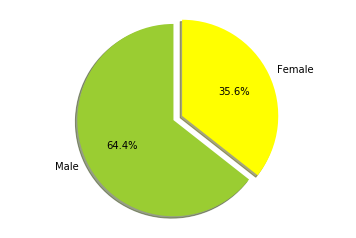

In [180]:
##Create a pie chart presenting the male/female proportion
total_rec = len(df)
df_sex = df.groupby(['sex'])['sex'].count()
Female = df_sex['female']
Male = df_sex['male']

# Data to plot 
labels = ['Male', 'Female']
sizes =[Male,Female]
colors = ['yellowgreen', 'yellow']
explode = (0.1, 0)  # explode 1st slice

#plot
plt.pie(sizes, explode=explode, colors=colors, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

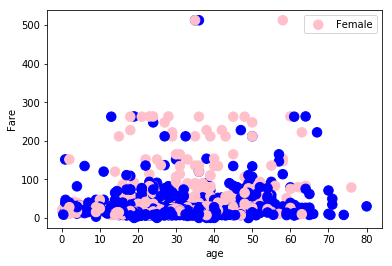

In [181]:
##2. Create a scatterplot with the Fare paid and the Age, 
x= df['age']
y= df['fare']
group =('male', 'blue')
df['color'] = np.where(df['sex']=='female','pink','blue')
plt.scatter(x, y,c=df['color'], s=90, label=['Male','Female'])
plt.xlabel('age')
plt.ylabel('Fare')
plt.legend(['Female','Male'])

# 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],

'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})


In [182]:
import pandas as pd

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [183]:
df['FlightNumber'] = [10045+(i*10) for i in range(5) ]
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [184]:
temp_df = pd.DataFrame()
temp_df[['From', 'To']] = df['From_To'].str.split('_', expand=True)
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [185]:
temp_df['From'] = temp_df['From'].str.capitalize()
temp_df['To'] = temp_df['To'].str.capitalize()
temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [186]:
df.drop('From_To',axis=1,inplace=True)
df=pd.concat([df,temp_df],axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [187]:

# list to have column names
Header=[]

# Fund the maxium length of delayed list
maxdelaylist = max(df['RecentDelays'].values.tolist(),key=len)

#append header for delay dynamically
for idx,val in enumerate(maxdelaylist):
    Header.append('delay_' + str(idx))

# DataFrame for delay elements
delay_df = df['RecentDelays'].apply(lambda x: ', '.join(map(str, x))).str.split(',',expand=True)
delay_df.columns = Header

# drop RecentDelays column from original dataframe
df.drop(columns = 'RecentDelays', inplace=True)

#concatinate delay DF with Original
df = pd.concat([df,delay_df],axis=1)
df

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23,47,None
1,10055,<Air France> (12),Madrid,Milan,,None,None
2,10065,(British Airways. ),London,Stockholm,24,43,87
3,10075,12. Air France,Budapest,Paris,13,None,None
4,10085,"""Swiss Air""",Brussels,London,67,32,None


# 2.6. Problem Statement: Pandas SQL

###### Problem statement 1:

Read the following data set:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Rename the columns as per the description from this file:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names



In [188]:
import pandas as pd
import sqlite3 as sql
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

df.columns =['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','label' ]
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Task:
    
Create a sql db from adult dataset and name it sqladb

In [189]:
import sqlite3
import pandas as pd
from pandas import DataFrame, Series

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
sqladb = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [191]:
sqladb.columns =['age','workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 
             'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','label' ]
sqladb.head(4)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Select 10 records from the adult sqladb

In [192]:
pysqldf = lambda q: sqldf(q, globals())
query = 'SELECT * FROM sqladb LIMIT 10;'
pysqldf(query)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


2. Show me the average hours per week of all men who are working in private sector

In [193]:
pysqldf("""select avg(hoursperweek) 'Average Hours Per Week' from sqladb where trim(workclass)='Private' ;""")

,Average Hours Per Week
0,40.267096



3. Show me the frequency table for education, occupation and relationship, separately

In [194]:
q = 'select education, count(1) as Frequency from sqladb group by education'
pysqldf(q)

,education,Frequency
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5354


In [196]:
q = 'select occupation, count(1) as Frequency from sqladb group by occupation'
pysqldf(q)

,occupation,Frequency
0,?,1843
1,Adm-clerical,3769
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [197]:
q = 'select relationship, count(1) as Frequency from sqladb group by relationship'
pysqldf(q)

,relationship,Frequency
0,Husband,13193
1,Not-in-family,8304
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


4. Are there any people who are married, working in private sector and having a master’s degree

In [198]:
query='''select * from sqladb where trim(maritalstatus) ='Married-civ-spouse' and trim(workclass)='Private' and trim(education)='Masters' '''
pysqldf(query)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
2,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
3,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
4,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
5,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
6,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
8,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
9,49,Private,192776,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States,>50K


5. What is the average, minimum and maximum age group for people working in different sectors

In [199]:
query='select workclass,avg(age),min(age),max(age) from sqladb group by workclass'
pysqldf(query)

,workclass,avg(age),min(age),max(age)
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436392,17,81
8,Without-pay,47.785714,19,72


6. Calculate age distribution by country

In [200]:
query='''select nativecountry as 'Native Country',avg(age),min(age),max(age) from sqladb group by nativecountry'''
pysqldf(query)

,Native Country,avg(age),min(age),max(age)
0,?,38.725557,17,90
1,Cambodia,37.789474,18,65
2,Canada,42.545455,17,80
3,China,42.533333,22,75
4,Columbia,39.711864,18,75
5,Cuba,45.768421,21,82
6,Dominican-Republic,37.728571,18,78
7,Ecuador,36.642857,21,90
8,El-Salvador,34.132075,17,79
9,England,41.155556,17,90


7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital- loss'

In [201]:
query='''select capitalgain - capitalloss as 'Net-Capital-Gain' ,capitalgain,capitalloss from sqladb'''
pysqldf(query)

,Net-Capital-Gain,capitalgain,capitalloss
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,14084,14084,0
8,5178,5178,0
9,0,0,0


###### Problem statement 2:

Read the following data set:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Task:


1. Create an sqlalchemy engine using a sample from the data set

In [4]:
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')
df.to_sql('my_alchem', engine)

2. Write two basic update queries

In [5]:

#update query
print(engine.execute('''UPDATE my_alchem
SET income = '<30K'
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

#after updating the record
print(engine.execute('''SELECT * FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

#update query2
print(engine.execute('''UPDATE my_alchem
SET income = '<30K'
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

#record after updating
print(engine.execute('''SELECT * FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', '<30K')]
[(2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', '<30K')]


3. Write two delete queries

In [6]:
#deleting the record
print(engine.execute('''DELETE FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

#after deleting record is empty
print(engine.execute('''SELECT * FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

#deleting the record
print(engine.execute('''DELETE FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

print(engine.execute('''SELECT * FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[]
[]


4. Write two filter queries

In [7]:
#filer query using LIke
print(engine.execute('''SELECT * FROM my_alchem WHERE race LIKE ' W%' ''').fetchall())

#fliter query using IN
print(engine.execute('''SELECT * FROM my_alchem WHERE age  IN(30, 40) ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5. Write two function queries

In [8]:
#using LENGTH function
print(engine.execute('''SELECT * FROM my_alchem
WHERE LENGTH(workclass)==8 ''').fetchall())

#using Upper function
print(engine.execute('''SELECT sex,upper(sex) FROM my_alchem
WHERE LENGTH(workclass)==9 ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

